# Comparación entre los distintos modelos desarrollados

In [18]:
from java_lexer import Lexer

A continuación, importaremos cada uno de los 4 modelos que desarrollamos. 

Para cada modelo, haremos un microestudio en el que se comparará el desempeño del modelo al detectar plagio en código de java con técnicas de ofuscación 

## Cargar el dataset

In [19]:
import os

# Ruta del directorio raíz
ruta_raiz = 'dataset_ofuscado'

# Lista para almacenar el contenido de cada carpeta
X = []

# Recorrer las carpetas
for carpeta in os.listdir(ruta_raiz):
    # Comprobar si es un directorio
    print (carpeta)
    if os.path.isdir(os.path.join(ruta_raiz, carpeta)):
        contenido_carpeta = []
        # Recorrer los archivos en la carpeta
        for archivo in os.listdir(os.path.join(ruta_raiz, carpeta)):
            # Comprobar si es un archivo Java
            if archivo.endswith('.java'):
                # Leer el contenido del archivo y añadirlo a la lista
                with open(os.path.join(ruta_raiz, carpeta, archivo), 'r') as f:
                    contenido_carpeta.append(f.read())
        # Añadir el contenido de la carpeta a la lista principal
        X.append(contenido_carpeta)



00af3420_5449d33c
00af3420_86102d81
00af3420_d92c5342
00af3420_f4d6d28d
0b04b41e_fdd41565
1
10
2
3
4
5
6
7
8
9


In [20]:
from java_lexer import Lexer
javaLexer = Lexer()

In [21]:
lexer1 = Lexer()


#X_train = [["int a = 123", "System.out.println('Hello, world!')"], ["for (int i = 0; i < 10; i++)", "String name = \"John\""]]#
#X_test = [["boolean flag = true", "System.exit(0);"], ["if (x > y)", "System.out.println(\"x is greater than y\")"]]

def get_token_string(code):
    lexer = Lexer()
    return lexer.get_token_string(code)

X_tokenized = [[get_token_string(code) for code in code_list] for code_list in X]

print(X_tokenized)


[['IDENTIFIER  IDENTIFIER  PUNCTUATION . IDENTIFIER  PUNCTUATION . OPERATOR * PUNCTUATION ; IDENTIFIER  IDENTIFIER  PUNCTUATION . IDENTIFIER  PUNCTUATION . OPERATOR * PUNCTUATION ; KEYWORD public KEYWORD class IDENTIFIER  PUNCTUATION { KEYWORD public KEYWORD static DATA_TYPE void IDENTIFIER  PUNCTUATION ( IDENTIFIER  PUNCTUATION [ PUNCTUATION ] IDENTIFIER  PUNCTUATION ) KEYWORD throws IDENTIFIER  PUNCTUATION { IDENTIFIER  IDENTIFIER  OPERATOR = KEYWORD new IDENTIFIER  PUNCTUATION ( SYSTEM_CALL System.in PUNCTUATION ) PUNCTUATION ; IDENTIFIER  IDENTIFIER  OPERATOR = KEYWORD new IDENTIFIER  PUNCTUATION ( SYSTEM_CALL System.out PUNCTUATION ) PUNCTUATION ; DATA_TYPE int IDENTIFIER  OPERATOR = IDENTIFIER  PUNCTUATION . IDENTIFIER  PUNCTUATION ( PUNCTUATION ) PUNCTUATION ; KEYWORD while PUNCTUATION ( IDENTIFIER  OPERATOR - OPERATOR - OPERATOR > NUMBER  PUNCTUATION ) PUNCTUATION { DATA_TYPE int IDENTIFIER  OPERATOR = IDENTIFIER  PUNCTUATION . IDENTIFIER  PUNCTUATION ( PUNCTUATION ) PUNCTUATIO

In [22]:
X_tokenized_firstcode = [pair[0] for pair in X_tokenized]
X_tokenized_secondcode = [pair[1] for pair in X_tokenized]


In [23]:
import pandas as pd
y = [0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
full_dataset_separado = pd.DataFrame(
    {'code1': X_tokenized_firstcode ,
     'code2': X_tokenized_secondcode,
     'plagium': y,
    })

In [24]:
full_dataset_separado

,code1,code2,plagium
0,IDENTIFIER IDENTIFIER PUNCTUATION . IDENTIFI...,IDENTIFIER IDENTIFIER PUNCTUATION . IDENTIFI...,0
1,IDENTIFIER IDENTIFIER PUNCTUATION . IDENTIFI...,IDENTIFIER IDENTIFIER PUNCTUATION . IDENTIFI...,0
2,IDENTIFIER IDENTIFIER PUNCTUATION . IDENTIFI...,IMPORT import java.io.BufferedReader; IMPORT i...,0
3,IDENTIFIER IDENTIFIER PUNCTUATION . IDENTIFI...,IDENTIFIER IDENTIFIER PUNCTUATION . IDENTIFI...,0
4,IMPORT import java.io.BufferedReader; IDENTIFI...,IMPORT import java.io.BufferedReader; IMPORT i...,0
5,KEYWORD public KEYWORD class IDENTIFIER PUNCT...,KEYWORD public KEYWORD class IDENTIFIER PUNCT...,1
6,KEYWORD public KEYWORD class IDENTIFIER PUNCT...,KEYWORD public KEYWORD class IDENTIFIER PUNCT...,1
7,KEYWORD public KEYWORD class IDENTIFIER PUNCT...,KEYWORD public KEYWORD class IDENTIFIER PUNCT...,1
8,KEYWORD public KEYWORD class IDENTIFIER PUNCT...,KEYWORD public KEYWORD class IDENTIFIER PUNCT...,1
9,KEYWORD public KEYWORD class IDENTIFIER PUNCT...,KEYWORD public KEYWORD class IDENTIFIER PUNCT...,1


Código para preprocesar para LSTM

# Importar modelos

## TF-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def compare_tokens_tfidf(tokens1, tokens2, plagium_value):

    # Crear un objeto TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Aplicar la vectorización TF-IDF a las cadenas de texto
    tfidf_matrix = vectorizer.fit_transform([tokens1, tokens2])

    # Calcular la similitud del coseno entre los vectores TF-IDF
    similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
    
    if similarity[0][0] >= plagium_value:
        return 1
    else:
        return 0

#esta funcion regresa la lista de predicciones para un set de inputs
def obtener_lista_predicciones_tfidf(this_X, this_y , this_plagium_value):
    
    y_pred = []
    for pair_tokens in this_X:
        result = compare_tokens_tfidf(pair_tokens[0], pair_tokens[1], this_plagium_value)  
        y_pred.append(result)


    return y_pred

#esta funcion regresa el accuracy obtenido para las predicciones en base al valor de la similitud usado para determinar plagio
def obtener_accuracy_tfidf(this_X, this_y , this_plagium_value):
    
    y_pred = []
    for pair_tokens in this_X:
        result = compare_tokens_tfidf(pair_tokens[0], pair_tokens[1], this_plagium_value)  
        y_pred.append(result)

    accuracy = sum(1 for pred, actual in zip(y_pred, this_y) if pred == actual) / len(this_y)

    return accuracy


## Rouge_l

In [27]:
import tensorflow as tf
import tensorflow_text as text

def compare_code_rouge_l(code_A, code_B, plagium_value):

    tokenizer = text.WhitespaceTokenizer()

    # Tokenize code A and code B
    code_A = tokenizer.tokenize([code_A])
    code_B = tokenizer.tokenize([code_B])

    # Compute Rouge-L
    result = text.metrics.rouge_l(code_A, code_B)

    if result.f_measure >= plagium_value:
        return 1
    else:
        return 0

#esta funcion regresa la lista de predicciones para un set de inputs
def obtener_lista_predicciones_rougel(this_X, this_y , this_plagium_value):
    
    y_pred = []
    for pair_tokens in this_X:
        result = compare_code_rouge_l(pair_tokens[0], pair_tokens[1], this_plagium_value)  
        y_pred.append(result)


    return y_pred

#esta funcion regresa el accuracy obtenido para las predicciones en base al valor de la similitud usado para determinar plagio
def obtener_accuracy_rougel(this_X, this_y , this_plagium_value):
    
    y_pred = []
    for pair_tokens in this_X:
        result = compare_code_rouge_l(pair_tokens[0], pair_tokens[1], this_plagium_value)  
        y_pred.append(result)

    accuracy = sum(1 for pred, actual in zip(y_pred, this_y) if pred == actual) / len(this_y)

    return accuracy

## Matrices de transición

In [28]:
import re 
import numpy as np
from collections import defaultdict
def calculate_transition_matrix(text):
    # Eliminar caracteres no alfanuméricos y convertir a minúsculas
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())

    words = text.split()  # Dividir el texto en palabras
    unique_words = sorted(list(set(words)))  # Obtener las palabras únicas en el texto
    word_indices = {word: i for i, word in enumerate(unique_words)}  # Asignar un índice numérico a cada palabra

    matrix = np.zeros((len(unique_words), len(unique_words)))  # Crear una matriz de ceros para la matriz de transición

    # Calcular las frecuencias de transición entre palabras consecutivas en el texto
    transitions = defaultdict(int)
    for i in range(len(words)-1):
        current_word = words[i]
        next_word = words[i+1]
        transitions[(current_word, next_word)] += 1

    # Llenar la matriz de transición con las frecuencias de transición
    for (current_word, next_word), count in transitions.items():
        current_index = word_indices[current_word]
        next_index = word_indices[next_word]
        matrix[current_index, next_index] = count

    # Normalizar las filas de la matriz para obtener probabilidades de transición
    row_sums = np.sum(matrix, axis=1)
    row_sums[row_sums == 0] = 1  # Reemplazar los valores de suma cero por 1 para evitar divisiones entre cero
    matrix = matrix / row_sums[:, np.newaxis]

    return matrix, unique_words



def cosine_ang(a, b):
    # Obtener las dimensiones de las matrices
    rows1, cols1 = a.shape
    rows2, cols2 = b.shape

    # Ajustar las dimensiones de las matrices si son diferentes
    if rows1 < rows2:
        a = np.vstack((a, np.zeros((rows2 - rows1, cols1))))
    elif rows1 > rows2:
        b = np.vstack((b, np.zeros((rows1 - rows2, cols2))))

    if cols1 < cols2:
        a = np.hstack((a, np.zeros((a.shape[0], cols2 - cols1))))
    elif cols1 > cols2:
        b = np.hstack((b, np.zeros((b.shape[0], cols1 - cols2))))

    aT = a.transpose()
    bT = b.transpose()
    C = np.dot(bT, a)
    prod_int = C.trace()

    normA = np.sqrt(np.dot(aT, a).trace())
    normB = np.sqrt(np.dot(bT, b).trace())

    cos_ang = prod_int / (normA * normB)

    return cos_ang


def compare_tokens_transition_matrix(a,b,plagium_value):
    a_matrix, words = calculate_transition_matrix(a)
    b_matrix, words = calculate_transition_matrix(b)
    cos_ang = cosine_ang(a_matrix,b_matrix)

    if cos_ang > plagium_value:
        return 1
    else:
        return 0

#esta funcion regresa la lista de predicciones para un set de inputs
def obtener_lista_predicciones_matrix(this_X, this_y , this_plagium_value):
    
    y_pred = []
    for pair_tokens in this_X:
        result = compare_tokens_transition_matrix(pair_tokens[0], pair_tokens[1], this_plagium_value)  
        y_pred.append(result)


    return y_pred
#esta funcion regresa el accuracy obtenido para las predicciones en base al valor de la similitud usado para determinar plagio
def obtener_accuracy_matrix(this_X, this_y , this_plagium_value):
    
    y_pred = []
    for pair_tokens in this_X:
        result = compare_tokens_transition_matrix(pair_tokens[0], pair_tokens[1], this_plagium_value)  
        y_pred.append(result)

    accuracy = sum(1 for pred, actual in zip(y_pred, this_y) if pred == actual) / len(this_y)

    return accuracy

## LSTM (Balanceado)

In [43]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

import io 
import json 
from keras_preprocessing.text import tokenizer_from_json
with open('tokenizer.json') as f:
    data = json.load(f)
    tokenizer = tokenizer_from_json(data)


max_sequence_length = 100


X_sequences_firstcode = tokenizer.texts_to_sequences(full_dataset_separado["code1"])
X_sequences_secondcode = tokenizer.texts_to_sequences(full_dataset_separado["code2"])


# Pad sequences to ensure uniform length
X_padded_firstcode = pad_sequences(X_sequences_firstcode, maxlen=max_sequence_length, padding='post')
X_padded_secondcode = pad_sequences(X_sequences_secondcode, maxlen=max_sequence_length, padding='post')


# Convert y_train and y_test to numpy arrays
y = np.array(full_dataset_separado["plagium"])


# Define the maximum sequence length
max_sequence_length = 100


# Define the inputs
input1 = Input(shape=(max_sequence_length,))
input2 = Input(shape=(max_sequence_length,))

# Embedding layer for input1
embedding_layer = Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_sequence_length)
embedded_input1 = embedding_layer(input1)
lstm_output1 = LSTM(128, return_sequences=True)(embedded_input1)
lstm_output1 = GlobalMaxPooling1D()(lstm_output1)

# Embedding layer for input2
embedded_input2 = embedding_layer(input2)
lstm_output2 = LSTM(128, return_sequences=True)(embedded_input2)
lstm_output2 = GlobalMaxPooling1D()(lstm_output2)

# Concatenate the LSTM outputs
merged_output = Concatenate()([lstm_output1, lstm_output2])

# Dense layers
dense_output = Dense(64, activation='relu')(merged_output)
dense_output = Dropout(0.5)(dense_output)

# Output layer
output = Dense(1, activation='sigmoid')(dense_output)

# Define the model
model_lstm = Model(inputs=[input1, input2], outputs=output)

# Compile the model
model_lstm.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])


C:\Users\cutic\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [44]:
#cargar el entrenamiento ya hecho
model_lstm.load_weights('./LSTM_Model/balanced_model')

## GPT 2 

In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from transformers import TFGPT2ForSequenceClassification, GPT2Tokenizer
import numpy as np

# Define the maximum sequence length
max_sequence_length = 1000

# Create the GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Convert the text data to sequences
X_test_flattened = full_dataset_separado["code1"] + full_dataset_separado["code2"]
tokenizer.pad_token = tokenizer.eos_token


X_test_sequences = tokenizer.batch_encode_plus(X_test_flattened,
                                               padding=True,
                                               truncation=True,
                                               max_length=max_sequence_length,
                                               return_tensors='tf')

# Convert y_train and y_test to numpy arrays
y_test = np.array(y)

# Define the inputs
input1 = Input(shape=(max_sequence_length,), dtype=tf.int32)
input2 = Input(shape=(max_sequence_length,), dtype=tf.int32)

# Load the pre-trained GPT-2 model
gpt2_model = TFGPT2ForSequenceClassification.from_pretrained('gpt2')

# Get the GPT-2 model outputs
outputs = gpt2_model(input1)['logits']

# Apply Dense layer to input sequences
dense_output1 = Dense(64)(input1)

dense_output1 = Dense(64)(dense_output1)

# Apply Dense layer to input sequences
dense_output2 = Dense(64)(input2)

dense_output2 = Dense(64)(dense_output2)

# Merge the Dense outputs
merged_output = Concatenate()([dense_output1, dense_output2])


# Add a dense layer for classification
dense_output = Dense(1, activation='sigmoid')(merged_output)

# Define the model
model_GPT = Model(inputs=[input1, input2], outputs=dense_output)

# Compile the model
model_GPT.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


All model checkpoint layers were used when initializing TFGPT2ForSequenceClassification.

Some layers of TFGPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
model_GPT.load_weights('./GPT_model/balanced_model')

### TF IDF

In [34]:
y_pred = obtener_lista_predicciones_tfidf(X_tokenized, y, 0.9999)

# Calculate accuracy by comparing predicted values to actual y_test labels
accuracy = obtener_accuracy_tfidf(X_tokenized, y, 0.9999)


# Print accuracy
print("Accuracy:", accuracy)

# Confusion matrix based on results
true_positive = sum(1 for pred, actual in zip(y_pred, y) if pred and actual)
true_negative = sum(1 for pred, actual in zip(y_pred, y) if not pred and not actual)
false_positive = sum(1 for pred, actual in zip(y_pred, y) if pred and not actual)
false_negative = sum(1 for pred, actual in zip(y_pred, y) if not pred and actual)
cm1 = confusion_matrix(y, y_pred)

print("Confusion Matrix for non tokenized code:")
print("True Positive:", true_positive)
print("True Negative:", true_negative)
print("False Positive:", false_positive)
print("False Negative:", false_negative)

Accuracy: 1.0
Confusion Matrix for non tokenized code:
True Positive: 10
True Negative: 5
False Positive: 0
False Negative: 0


In [35]:
y_pred = obtener_lista_predicciones_rougel(X_tokenized, y, 0.75)

# Calculate accuracy by comparing predicted values to actual y_test labels
accuracy = obtener_accuracy_rougel(X_tokenized, y, 0.9999)

# Print accuracy
print("Accuracy:", accuracy)

# Confusion matrix based on results
true_positive = sum(1 for pred, actual in zip(y_pred, y) if pred and actual)
true_negative = sum(1 for pred, actual in zip(y_pred, y) if not pred and not actual)
false_positive = sum(1 for pred, actual in zip(y_pred, y) if pred and not actual)
false_negative = sum(1 for pred, actual in zip(y_pred, y) if not pred and actual)
cm2 = confusion_matrix(y, y_pred)

print("Confusion Matrix for non tokenized code:")
print("True Positive:", true_positive)
print("True Negative:", true_negative)
print("False Positive:", false_positive)
print("False Negative:", false_negative)

Accuracy: 0.9333333333333333
Confusion Matrix for non tokenized code:
True Positive: 10
True Negative: 5
False Positive: 0
False Negative: 0


In [36]:
y_pred = obtener_lista_predicciones_matrix(X_tokenized, y, 0.75)

# Calculate accuracy by comparing predicted values to actual y_test labels
accuracy = obtener_accuracy_matrix(X_tokenized, y, 0.9999)

# Print accuracy
print("Accuracy:", accuracy)

# Confusion matrix based on results
true_positive = sum(1 for pred, actual in zip(y_pred, y) if pred and actual)
true_negative = sum(1 for pred, actual in zip(y_pred, y) if not pred and not actual)
false_positive = sum(1 for pred, actual in zip(y_pred, y) if pred and not actual)
false_negative = sum(1 for pred, actual in zip(y_pred, y) if not pred and actual)
cm3 = confusion_matrix(y, y_pred)

print("Confusion Matrix for non tokenized code:")
print("True Positive:", true_positive)
print("True Negative:", true_negative)
print("False Positive:", false_positive)
print("False Negative:", false_negative)

Accuracy: 1.0
Confusion Matrix for non tokenized code:
True Positive: 10
True Negative: 5
False Positive: 0
False Negative: 0


In [46]:
# Evaluate the model on the test data
test_loss, test_accuracy = model_lstm.evaluate([X_padded_firstcode, X_padded_secondcode], y)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

from sklearn.metrics import confusion_matrix

# Get the predicted labels for the test data
y_pred = model_lstm.predict([X_padded_firstcode, X_padded_secondcode])
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate the confusion matrix
cm4 = confusion_matrix(y, y_pred)




1/1 [==============================] - 0s 102ms/step - loss: 4.6853 - accuracy: 0.2667
Test Accuracy: 0.2666666805744171
1/1 [==============================] - 0s 54ms/step


In [39]:
# Evaluate the model on the test data
test_loss, test_accuracy = model_GPT.evaluate([X_test_sequences["input_ids"], X_test_sequences["attention_mask"]], y)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

from sklearn.metrics import confusion_matrix

# Get the predicted labels for the test data
y_pred = model_GPT.predict([X_test_sequences["input_ids"], X_test_sequences["attention_mask"]])
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate the confusion matrix
cm5 = confusion_matrix(y, y_pred)




1/1 [==============================] - 0s 80ms/step - loss: 5344.8481 - accuracy: 0.4000
Test Accuracy: 0.4000000059604645
1/1 [==============================] - 0s 36ms/step


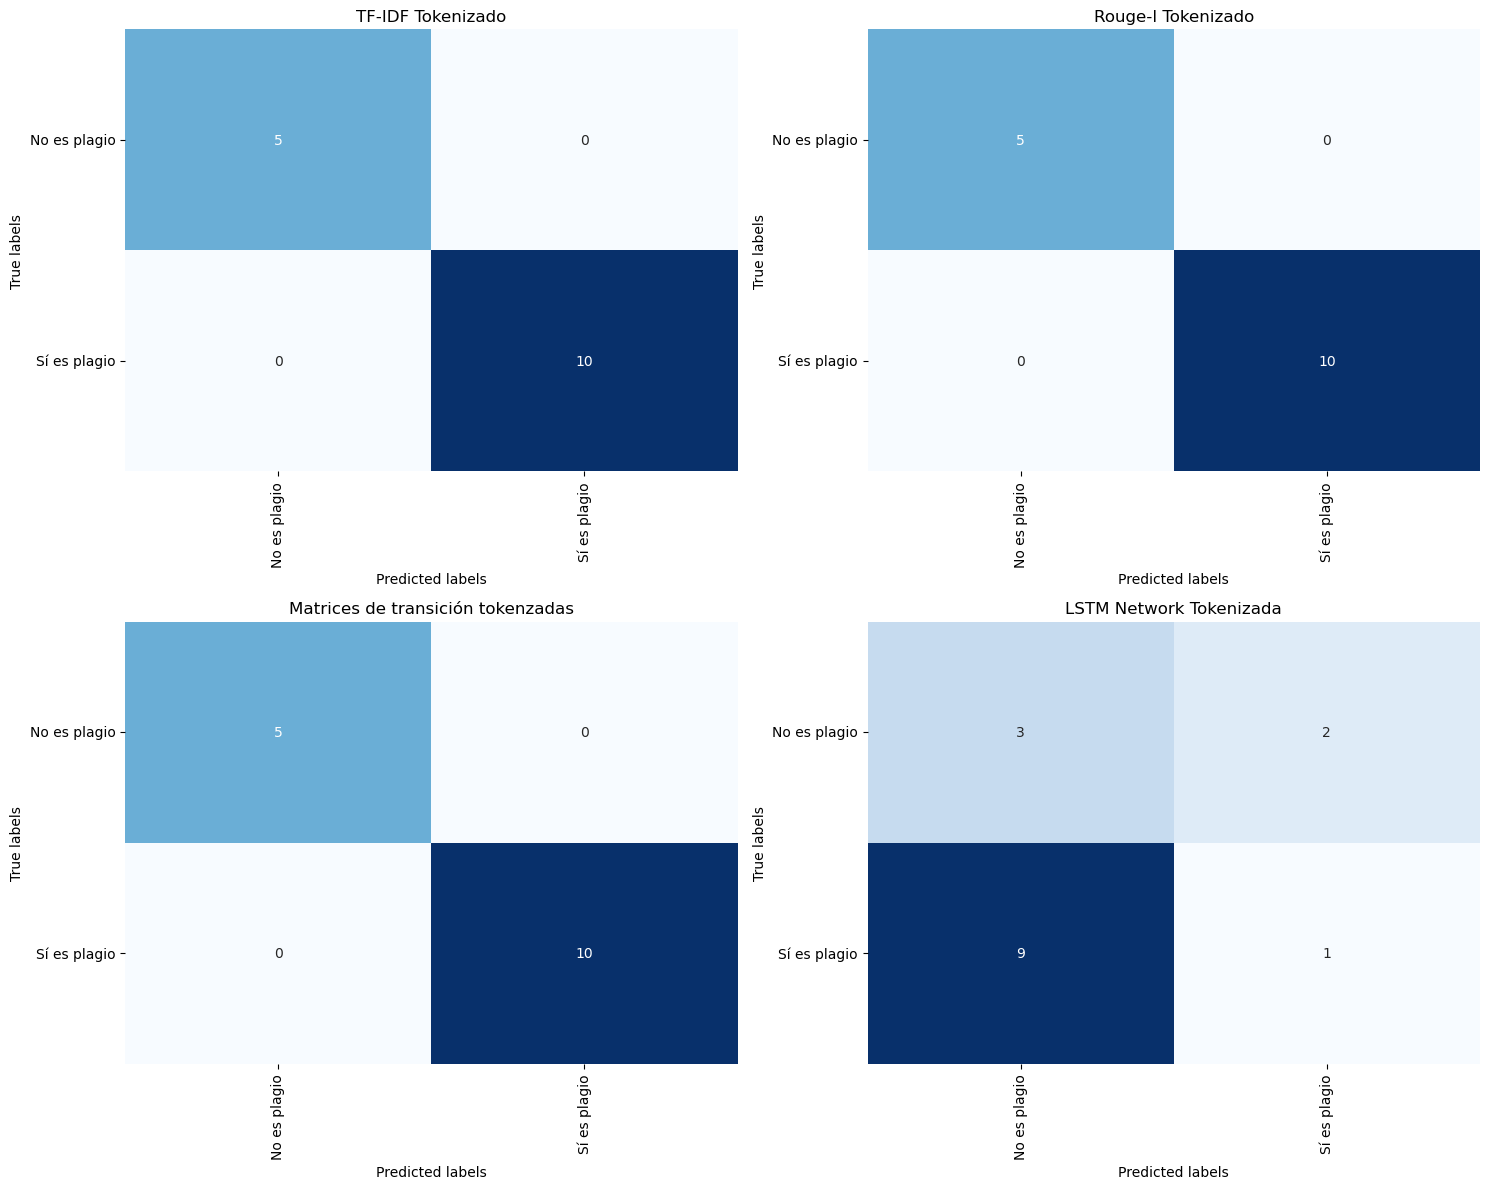

[Text(0, 0.5, 'No es plagio'), Text(0, 1.5, 'Sí es plagio')]

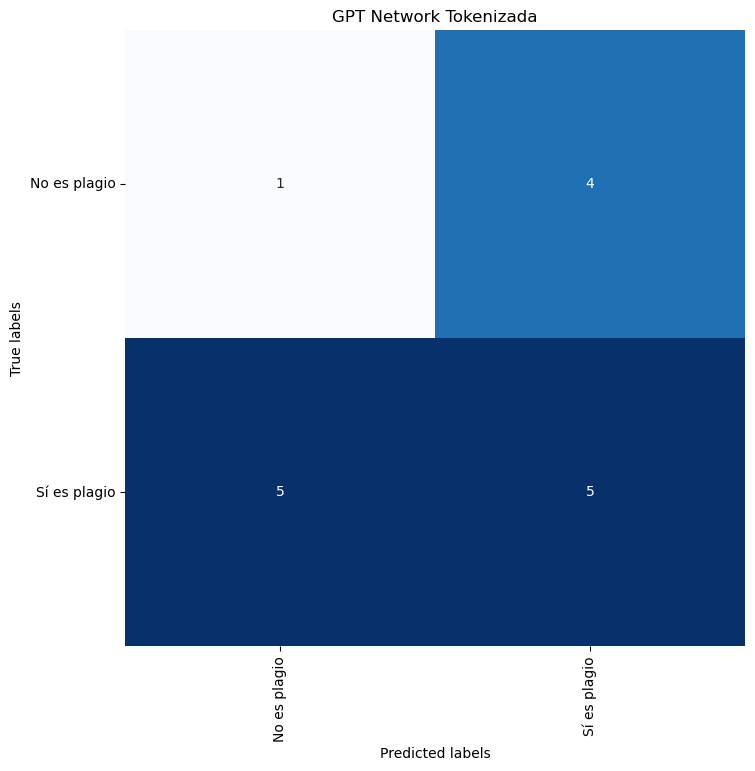

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = ["No es plagio", "Sí es plagio"]

# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Graficar las primeras dos matrices de confusión
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[0, 0])
axs[0, 0].set_xlabel('Predicted labels')
axs[0, 0].set_ylabel('True labels')
axs[0, 0].set_title('TF-IDF Tokenizado')
axs[0, 0].set_xticklabels(class_labels, rotation=90)
axs[0, 0].set_yticklabels(class_labels, rotation=0)

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[0, 1])
axs[0, 1].set_xlabel('Predicted labels')
axs[0, 1].set_ylabel('True labels')
axs[0, 1].set_title('Rouge-l Tokenizado')
axs[0, 1].set_xticklabels(class_labels, rotation=90)
axs[0, 1].set_yticklabels(class_labels, rotation=0)

# Graficar las siguientes dos matrices de confusión
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[1, 0])
axs[1, 0].set_xlabel('Predicted labels')
axs[1, 0].set_ylabel('True labels')
axs[1, 0].set_title('Matrices de transición tokenzadas')
axs[1, 0].set_xticklabels(class_labels, rotation=90)
axs[1, 0].set_yticklabels(class_labels, rotation=0)

sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[1, 1])
axs[1, 1].set_xlabel('Predicted labels')
axs[1, 1].set_ylabel('True labels')
axs[1, 1].set_title('LSTM Network Tokenizada')
axs[1, 1].set_xticklabels(class_labels, rotation=90)
axs[1, 1].set_yticklabels(class_labels, rotation=0)

# Ajustar los subplots
plt.tight_layout()

# Mostrar el plot con las cuatro matrices de confusión
plt.show()

# Crear una nueva figura y subplots para la quinta matriz de confusión
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('GPT Network Tokenizada')
ax.set_xticklabels(class_labels, rotation=90)
ax.set_yticklabels(class_labels, rotation=0)



### JPLAG

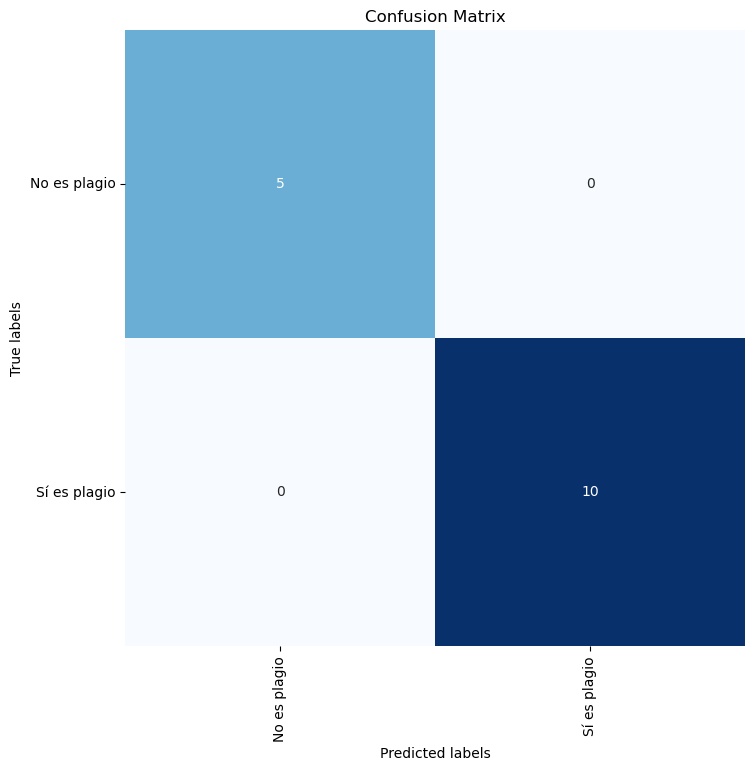

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from prediction
df1 = pd.read_csv('./jplag/reports/jplag/version_1/report.csv')

# Load true data
df2 = pd.read_csv('./jplag/versions/labels.csv')

#Remove empty lines
df1 = df1.dropna()
df2 = df2.dropna()

#Sort dataframes
df1 = df1.sort_values(['sub1', 'sub2'])
df2 = df2.sort_values(['sub1', 'sub2'])

# Obtain relevant columns
y_true = df2['verdict']
y_pred = df1['gold-verd']

# Calculate confusion matrix
confusion = confusion_matrix(y_true, y_pred)

# Get class labels
class_labels = ["No es plagio", "Sí es plagio"]

# Create figure
plt.figure(figsize=(8, 8))
ax = plt.gca()

# Create heatmap with seaborn
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

# Add labels to axis
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.set_xticklabels(class_labels, rotation=90)
ax.set_yticklabels(class_labels, rotation=0)

# Show confusion matrix
plt.show()